In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
from sklearn.datasets import load_wine

In [81]:
wine=load_wine()

In [82]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [83]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [84]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df['Target']=wine.target

In [85]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [86]:
df.Target.value_counts()

1    71
0    59
2    48
Name: Target, dtype: int64

In [87]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [88]:
from sklearn.model_selection import train_test_split


In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
xtrain.shape

(142, 13)

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [94]:
lda=LDA(n_components=2)
xtrain=lda.fit_transform(xtrain,ytrain)
xtest=lda.transform(xtest)

In [95]:
#pca=PCA(n_components=2)
#xtrain=pca.fit_transform(xtrain)
#xtest=pca.transform(xtest)

In [96]:
xtrain.shape

(142, 2)

In [97]:
lda.explained_variance_ratio_

array([0.73931691, 0.26068309])

In [98]:
#pca.explained_variance_ratio_

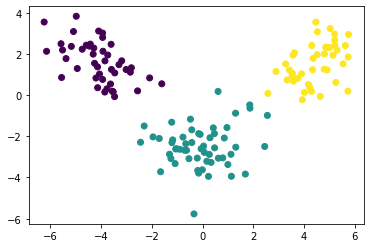

In [99]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logit_reg=LogisticRegression(random_state=0)

In [102]:
logit_reg.fit(xtrain,ytrain)


LogisticRegression(random_state=0)

In [103]:
ypred=logit_reg.predict(xtest)

In [104]:
from sklearn.metrics import confusion_matrix


<AxesSubplot:>

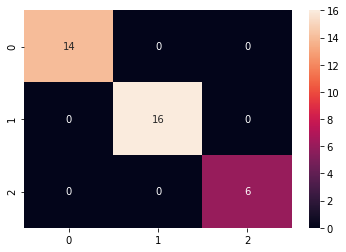

In [105]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

<AxesSubplot:>

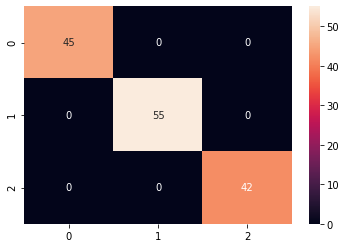

In [106]:
sns.heatmap(confusion_matrix(ytrain,logit_reg.predict(xtrain)),annot=True)